<img src="https://i.imgur.com/Y6EMKKg.jpg" style="float: left; margin: 15px;" width="75">

## Exploratory Data Analysis

Joseph Darby

---

## Import Libraries

In [61]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', 200)
%matplotlib inline

## Load & Clean the Data

In [67]:
# Read in data.
df = pd.read_csv('../01_Data_Cleaning/datasets_database/6.11_combined_df.csv')

# Convert 'result' series to numeric
df['result'] = df['match_result'].map({'L' : 0, 'D': 1, 'W': 2})
df = df.drop(columns=['Unnamed: 0', 'match_result'])

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19620 entries, 0 to 19619
Columns: 102 entries, country to result
dtypes: float64(47), int64(4), object(51)
memory usage: 15.3+ MB


In [64]:
df.describe()

year  home_team_goal  away_team_goal         B365A  \
count  19620.000000    19620.000000    19620.000000  19620.000000   
mean    2012.665851        1.555454        1.171254      4.673757   
std        1.892726        1.303848        1.149877      3.751605   
min     2010.000000        0.000000        0.000000      1.080000   
25%     2011.000000        1.000000        0.000000      2.500000   
50%     2013.000000        1.000000        1.000000      3.500000   
75%     2015.000000        2.000000        2.000000      5.250000   
max     2015.000000       10.000000        9.000000     51.000000   

              B365D         B365H           BWA           BWD           BWH  \
count  19620.000000  19620.000000  19620.000000  19620.000000  19620.000000   
mean       3.858078      2.642904      4.406443      3.766773      2.573626   
std        1.127006      1.816587      3.313592      1.044657      1.659418   
min        1.530000      1.040000      1.100000      1.650000      1.030000   
25%        3.300000      1.670000      2.500000      3.250000      1.650000   
50%        3.500000      2.100000      3.400000      3.400000      2.100000   
75%        4.000000      2.800000      5.000000      3.850000      2.750000   
max       17.000000     26.000000     51.000000     19.500000     34.000000   

                IWA           IWD           IWH  home_player_1_rating  \
count  19620.000000  19620.000000  19620.000000          19620.000000   
mean       4.161049      3.625793      2.483765             72.597205   
std        2.876279      0.809551      1.469416              6.039763   
min        1.100000      1.500000      1.050000             48.000000   
25%        2.500000      3.200000      1.650000             68.473684   
50%        3.300000      3.300000      2.100000             73.161290   
75%        4.650000      3.700000      2.650000             76.823529   
max       25.000000     11.000000     20.000000             86.954545   

       home_player_2_rating  home_player_3_rating  home_player_4_rating  \
count          19620.000000          19620.000000          19620.000000   
mean              69.998315             71.556879             71.498051   
std                5.336720              5.542992              5.649641   
min               47.333333             51.000000             49.000000   
25%               66.200000             67.595833             67.650000   
50%               70.490000             71.750000             71.600000   
75%               73.272727             75.480000             75.444444   
max               86.733333             85.888889             86.733333   

       home_player_5_rating  home_player_6_rating  home_player_7_rating  \
count          19620.000000          19620.000000          19620.000000   
mean              69.783722             71.481959             71.623365   
std                5.168068              5.599220              5.570425   
min               49.000000             47.750000             47.750000   
25%               66.333333             67.684211             67.785714   
50%               69.962963             71.625000             71.625000   
75%               73.000000             75.121212             75.240000   
max               87.840000             91.280000             88.458333   

       home_player_8_rating  home_player_9_rating  home_player_10_rating  \
count          19620.000000          19620.000000           19620.000000   
mean              71.670566             72.254902              72.471669   
std                5.631038              5.881655               5.969197   
min               50.000000             49.000000              51.142857   
25%               67.796429             68.357143              68.333333   
50%               71.625000             72.238095              72.344828   
75%               75.293333             76.080000              76.165085   
max               91.280000             92.192308              

## Create Dataframe with least correlated features removed:`

In [66]:
# Get list of all columns
col_names = list(df.columns)
col_names

# Manually remove least correlated features:
columns_list= ['country', 'league_name', 'home_team', 'away_team', 'home_team_goal', 'away_team_goal', 'B365A', 'B365D',
               'B365H', 'BWA', 'BWD', 'BWH', 'IWA', 'IWD', 'IWH', 'home_player_1', 'home_player_1_rating', 'home_player_2', 'home_player_2_rating', 'home_player_3',
               'home_player_3_rating', 'home_player_4', 'home_player_4_rating', 'home_player_5', 'home_player_5_rating',
               'home_player_6', 'home_player_6_rating', 'home_player_7', 'home_player_7_rating', 'home_player_8',
               'home_player_8_rating', 'home_player_9', 'home_player_9_rating', 'home_player_10', 'home_player_10_rating',
               'home_player_11', 'home_player_11_rating', 'away_player_1', 'away_player_1_rating', 'away_player_2',
               'away_player_2_rating', 'away_player_3', 'away_player_3_rating', 'away_player_4', 'away_player_4_rating',
               'away_player_5', 'away_player_5_rating', 'away_player_6', 'away_player_6_rating', 'away_player_7',
               'away_player_7_rating', 'away_player_8', 'away_player_8_rating', 'away_player_9', 'away_player_9_rating',
               'away_player_10', 'away_player_10_rating', 'away_player_11', 'away_player_11_rating', 'result']

# Create dataframe:
no_team_data_df = df[columns_list]

## Explore and Visualize the Data

In [147]:
sns.pairplot(no_team_data_df.corr(), palette='viridis')

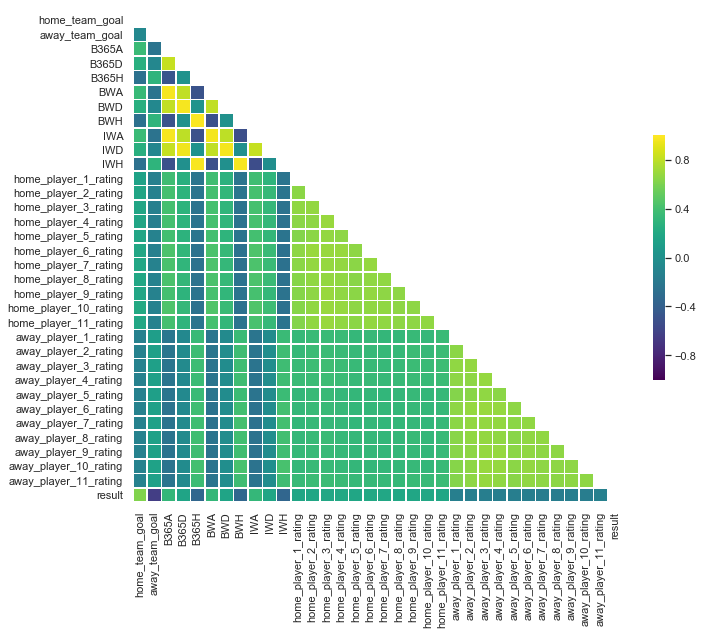

In [7]:
sns.set(style="white")

# Compute the correlation matrix
corr = no_team_data_df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap='viridis', vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

plt.savefig('./01_Graphs_and_Images/result_corr.jpg')

# Referenced Seaborn documentation website for code:
# https://seaborn.pydata.org/examples/many_pairwise_correlations.html?highlight=correlation%20plots

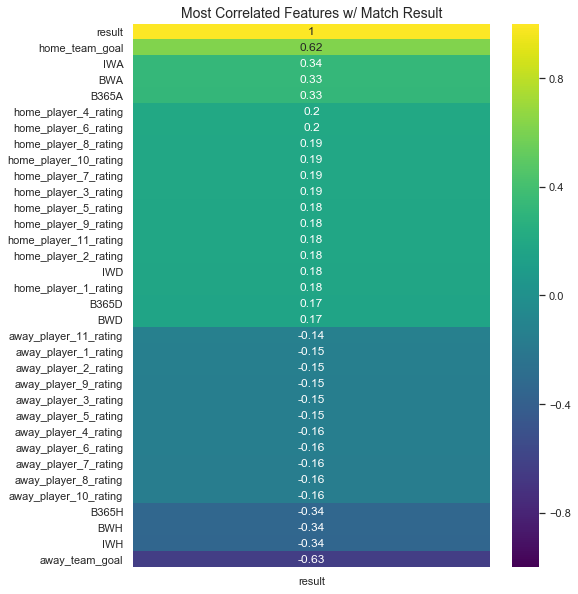

In [8]:
plt.figure(figsize=(8, 10))
sns.heatmap(no_team_data_df.corr()[['result']].sort_values(by='result', ascending = False), cmap = "viridis", annot=True, vmin= -1, vmax = 1)
plt.title('Most Correlated Features w/ Match Result', fontsize=14)
plt.savefig('./01_Graphs_and_Images/result_correlation.jpg');

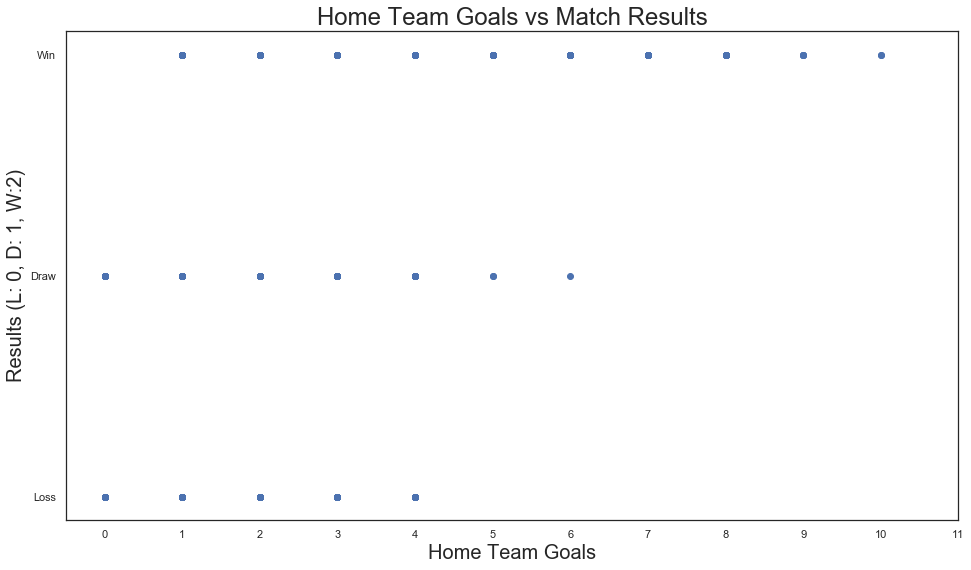

In [9]:
# Establish the size of the figure.
plt.figure(figsize=(16, 9))

# Create scatter plot of high prices versus volume.
plt.scatter(df['home_team_goal'],   # X axis
            df['result']) # Y axis

plt.title('Home Team Goals vs Match Results', fontsize= 24)
plt.ylabel("Results (L: 0, D: 1, W:2)", fontsize = 20)
plt.xlabel("Home Team Goals", fontsize = 20)
plt.xticks(np.arange(0,12, step = 1))
plt.yticks(np.arange(0,2.5, step = 1), labels=['Loss', 'Draw', 'Win'])
plt.savefig('./01_Graphs_and_Images/goal_corr.jpg');

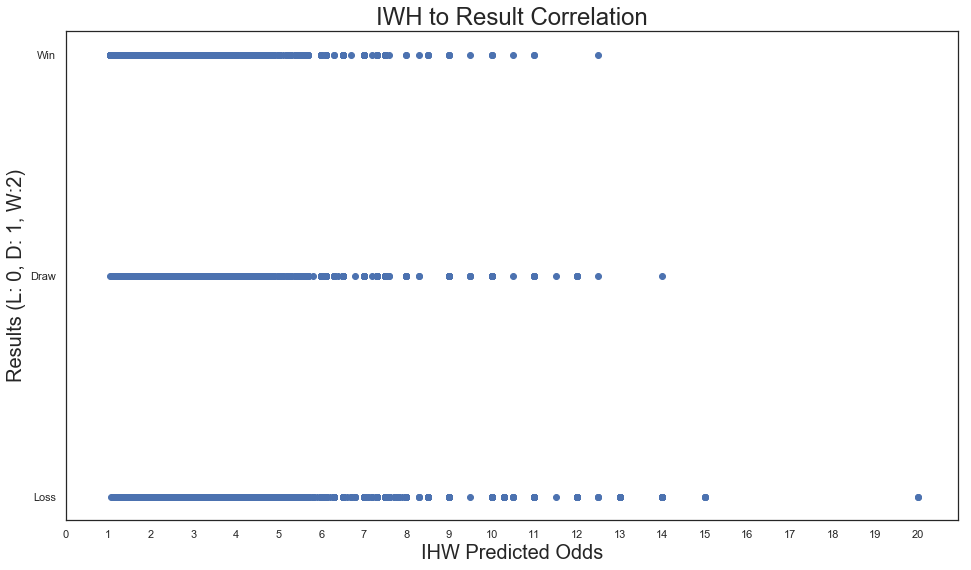

In [10]:
# Establish the size of the figure.
plt.figure(figsize=(16, 9))

# Create scatter plot of high prices versus volume.
plt.scatter(df['IWH'],   # X axis
            df['result']) # Y axis

plt.title('IWH to Result Correlation', fontsize= 24)
plt.ylabel("Results (L: 0, D: 1, W:2)", fontsize = 20)
plt.xlabel("IHW Predicted Odds", fontsize = 20)
plt.xticks(np.arange(0,21, step = 1))
plt.yticks(np.arange(0,2.5, step = 1), labels=['Loss','Draw','Win']);

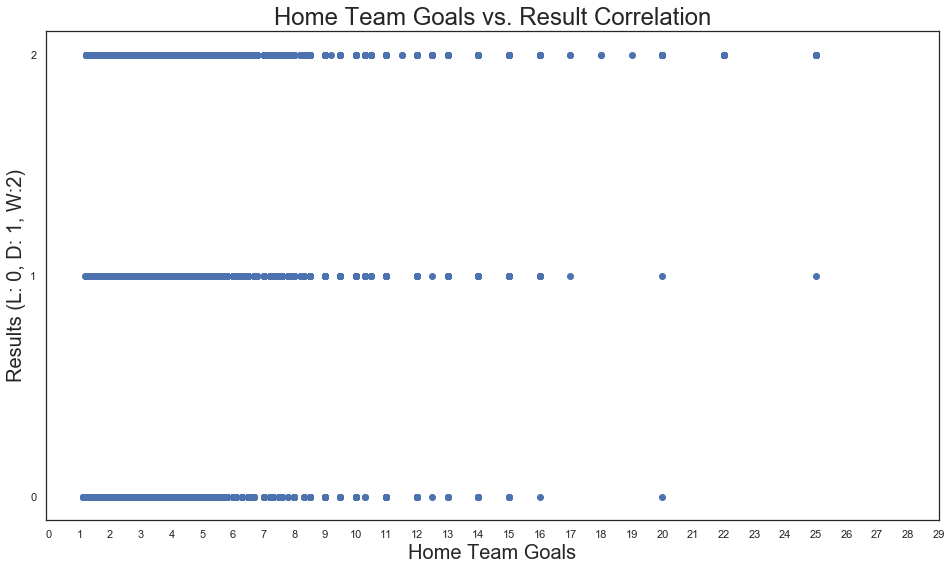

In [11]:
# Establish the size of the figure.
plt.figure(figsize=(16, 9))

# Create scatter plot of high prices versus volume.
plt.scatter(df['IWA'],   # X axis
            df['result']) # Y axis

plt.title('Home Team Goals vs. Result Correlation', fontsize= 24)
plt.ylabel("Results (L: 0, D: 1, W:2)", fontsize = 20)
plt.xlabel("Home Team Goals", fontsize = 20)
plt.xticks(np.arange(0,30, step = 1))
plt.yticks(np.arange(0,2.5, step = 1));

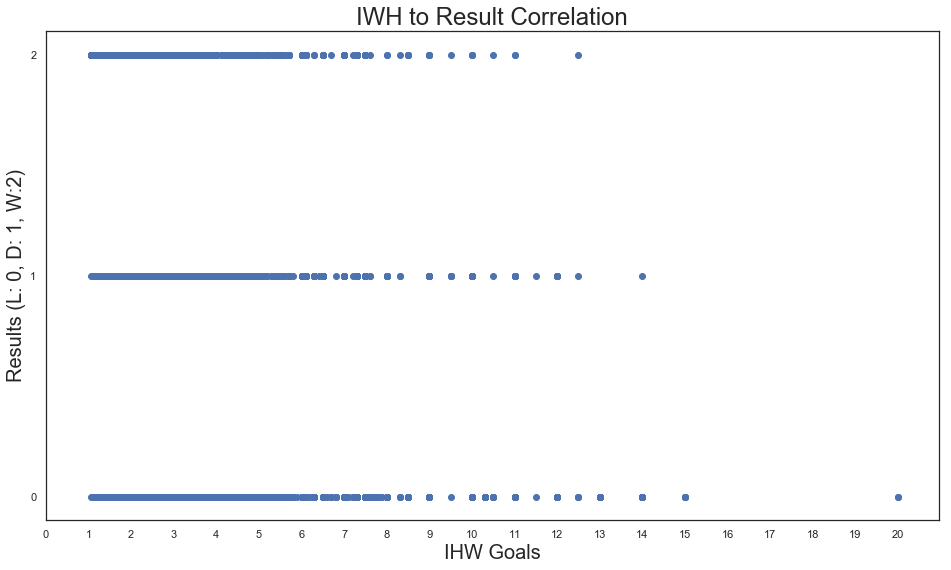

In [12]:
# Establish the size of the figure.
plt.figure(figsize=(16, 9))

# Create scatter plot of high prices versus volume.
plt.scatter(df['IWH'],   # X axis
            df['result']) # Y axis

plt.title('IWH to Result Correlation', fontsize= 24)
plt.ylabel("Results (L: 0, D: 1, W:2)", fontsize = 20)
plt.xlabel("IHW Goals", fontsize = 20)
plt.xticks(np.arange(0,21, step = 1))
plt.yticks(np.arange(0,2.5, step = 1));

In [13]:
df[df["IWH"] == 20]

country      league_name   home_team     away_team  year  year_month  \
19176   Spain  Spain LIGA BBVA  Córdoba CF  FC Barcelona  2015  2015-05-01   
19560   Spain  Spain LIGA BBVA  Granada CF  FC Barcelona  2015  2016-05-01   

       home_team_goal  away_team_goal  B365A  B365D  B365H  BWA   BWD   BWH  \
19176               0               8   1.08   11.0   26.0  1.1  10.0  34.0   
19560               0               3   1.08   11.0   26.0  1.1   9.0  21.0   

       IWA  IWD   IWH     home_player_1  home_player_1_rating  \
19176  1.1  8.0  20.0       Juan Carlos             62.529412   
19560  1.1  8.0  20.0  Andres Fernandez             72.347826   

           home_player_2  home_player_2_rating       home_player_3  \
19176  Jose Angel Crespo             66.923077   Aleksandar Pantic   
19560       Miguel Lopes             72.541667  Jean-Sylvain Babin   

       home_player_3_rating  home_player_4  home_player_4_rating  \
19176             71.222222         Deivid             66.809524   
19560             68.954545  Ricardo Costa             75.545455   

      home_player_5  home_player_5_rating       home_player_6  \
19176   Inigo Lopez             70.052632        Edimar Fraga   
19560  David Lomban             68.000000  Abdoulaye Doucoure   

       home_player_6_rating home_player_7  home_player_7_rating  \
19176             69.235294         Fidel             69.913043   
19560             64.611111   Ruben Perez             72.535714   

       home_player_8  home_player_8_rating home_player_9  \
19176           Luso             65.222222    Rene Krhin   
19560  Ruben Rochina             68.384615     Fran Rico   

       home_player_9_rating       home_player_10  home_player_10_rating  \
19176             70.090909                 Bebe                   68.2   
19560             69.263158  Adalberto Penaranda                   68.5   

         home_player_11  home_player_11_rating          away_player_1  \
19176     Florin Andone              66.333333          Claudio Bravo   
19560  Youssef El Arabi              71.173913  Marc-Andre ter Stegen   

       away_player_1_rating away_player_2  away_player_2_rating  \
19176             77.650000  Daniel Alves                  84.2   
19560             76.913043  Daniel Alves                  84.2   

           away_player_3  away_player_3_rating      away_player_4  \
19176       Gerard Pique             83.571429  Javier Mascherano   
19560  Javier Mascherano             83.880000       Gerard Pique   

       away_player_4_rating away_player_5  away_player_5_rating away_player_6  \
19176             83.880000    Jordi Alba             77.722222  Ivan Rakitic   
19560             83.571429    Jordi Alba             77.722222  Ivan Rakitic   

       away_player_6_rating    away_player_7  away_player_7_rating  \
19176             79.230769  Sergio Busquets                 81.44   
19560             79.230769  Sergio Busquets                 81.44   

        away_player_8  away_player_8_rating away_player_9  \
19176  Andres Iniesta                 88.32  Lionel Messi   
19560  Andres Iniesta                 88.32  Lionel Messi   

       away_player_9_rating away_player_10  away_player_10_rating  \
19176             92.192308    Luis Suarez                 85.275   
19560             92.192308    Luis Suarez                 85.275   

      away_player_11  away_player_11_rating  home_buildUpPlaySpeed  \
19176         Neymar                   83.8                    NaN   
19560         Neymar                   83.8                    NaN   

      home_buildUpPlaySpeedClass home_buildUpPlayDribblingClass  \
19176                        NaN                            NaN   
19560                        NaN                            NaN   

       home_buildUpPlayPassing home_buildUpPlayPassingClass  \
19176                      NaN                          NaN   
19560                      NaN                          NaN   

      home_buildUpPlayPositioningCla

In [14]:
df[df['IWA'] == 25]

country             league_name       home_team       away_team  \
1846       England  England Premier League         Chelsea  Wigan Athletic   
14058  Netherlands  Netherlands Eredivisie             PSV      SC Cambuur   
18006        Spain         Spain LIGA BBVA    FC Barcelona      Granada CF   
18493        Spain         Spain LIGA BBVA    FC Barcelona      Granada CF   
18795        Spain         Spain LIGA BBVA  Real Madrid CF      UD Almería   
18819        Spain         Spain LIGA BBVA    FC Barcelona       Getafe CF   
19057        Spain         Spain LIGA BBVA    FC Barcelona      Levante UD   
19133        Spain         Spain LIGA BBVA    FC Barcelona      UD Almería   
19145        Spain         Spain LIGA BBVA  Real Madrid CF        SD Eibar   
19281        Spain         Spain LIGA BBVA  Real Madrid CF   UD Las Palmas   
19551        Spain         Spain LIGA BBVA    FC Barcelona    RCD Espanyol   
19569        Spain         Spain LIGA BBVA  Real Madrid CF      Granada CF   

       year  year_month  home_team_goal  away_team_goal  B365A  B365D  B365H  \
1846   2010  2010-05-01               8               0   23.0   10.0   1.10   
14058  2015  2016-05-01               6               2   26.0   11.0   1.06   
18006  2012  2012-03-01               5               3   34.0   13.0   1.05   
18493  2013  2012-09-01               2               0   34.0   12.0   1.05   
18795  2014  2014-04-01               4               0   29.0   15.0   1.05   
18819  2014  2014-05-01               2               2   26.0   11.0   1.07   
19057  2015  2015-02-01               5               0   34.0   15.0   1.05   
19133  2015  2015-04-01               4               0   41.0   13.0   1.05   
19145  2015  2015-04-01               3               0   34.0   13.0   1.06   
19281  2015  2015-10-01               3               1   23.0   11.0   1.09   
19551  2015  2016-05-01               5               0   41.0   17.0   1.04   
19569  2015  2015-09-01               1               0   26.0   15.0   1.06   

        BWA    BWD   BWH   IWA   IWD   IWH          home_player_1  \
1846   17.0   8.75  1.10  25.0  10.0  1.05              Petr Cech   
14058  26.0   9.50  1.07  25.0  10.0  1.05            Jeroen Zoet   
18006  29.0  12.00  1.05  25.0  10.0  1.05          Victor Valdes   
18493  29.0  11.00  1.06  25.0  10.0  1.05          Victor Valdes   
18795  29.0  12.00  1.05  25.0  11.0  1.05            Diego Lopez   
18819  26.0  11.00  1.06  25.0  11.0  1.05      Jose Manuel Pinto   
19057  26.0  12.00  1.05  25.0  11.0  1.05          Claudio Bravo   
19133  51.0  15.50  1.05  25.0  11.0  1.05          Claudio Bravo   
19145  21.0  17.00  1.07  25.0  11.0  1.05           Keylor Navas   
19281  18.0   9.25  1.10  25.0  11.0  1.05      Francisco Casilla   
19551  31.0  19.50  1.03  25.0  11.0  1.05  Marc-Andre ter Stegen   
19569  34.0  13.00  1.07  25.0  11.0  1.05           Keylor Navas   

       home_player_1_rating       home_player_2  home_player_2_rating  \
1846              85.272727  Branislav Ivanovic             80.161290   
14058             71.291667      Santiago Arias             70.294118   
18006             83.636364        Daniel Alves             84.200000   
18493             83.636364        Daniel Alves             84.200000   
18795             81.240000     Nacho Fernandez             70.647059   
18819             73.833333        Daniel Alves             84.200000   
19057             77.650000      Martin Montoya             73.214286   
19133             77.650000        Daniel Alves             84.200000   
19145             75.043478      Alvaro Arbeloa             78.454545   
19281             72.619048      Raphael Varane             78.105263   
19551             76.913043        Daniel Alves             84.200000   
19569             75.043478     Daniel Carvajal             74.600000   

           home_player_3  home_player_3_rating      home_player_4  \
1846                Alex             8

In [68]:
df['result'].value_counts()

2    9017
0    5655
1    4948
Name: result, dtype: int64

In [69]:
home_results = [5655, 4948, 9017]

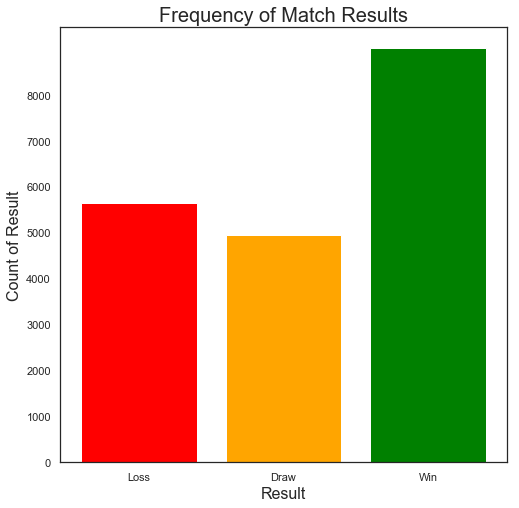

In [70]:
plt.figure(figsize=(8,8))
plt.bar(['Loss','Draw','Win'], height=home_results, align='center', color= ['red', 'orange', 'green'])
plt.title('Frequency of Match Results', fontsize= 20)
plt.ylabel('Count of Result', fontsize= 16)
plt.yticks(np.arange(0,9000,1000))
plt.xlabel('Result', fontsize=16)
plt.savefig('./01_Graphs_and_Images/WLD_counts.jpg');

## Team-Specific Performance Dataframe

I am curious to see home team performance as it relates to match results for each team. The individual team is the index with columns that consist of win, loss and draw counts. It will be essential to calculate the win, loss, and draw percentages as teams do not share the same number of games where data has been collected. This is due to a couple of reasons. The data only consists of matches from each country's top professional league and does not include inter-country tournaments, such as the UEFA Champion's League. In addition, these country-specific leagues generally share common characteristics:

- Each country has a hierarchy of professional league division. 
    - In England, the English Premiership League (EPL) is the top and first division in the professional hierarchy, followed by the Championship Division (2nd division), then League One (3rd division), then League Two (4th division), and so on.  
- At the end of each season, a certain number of bottom-ranked teams in each country's top professional league will be relegated to the professional division below. 
- In the other direction, the same number of top finishing teams in the 2nd Division, England's Championship Division, will be promoted to the top professional league, England's EPL.

**The number of games with data gathered for each team can differ due to the fluctuation in the teams competing in each country's first division from season to season. Calculating performance as a percentage will better illustrate a team's performance in the top division, as opposed to simply counting match results.**

In [51]:
df['win'] = df['result'].map({0:0, 1:0, 2:1})
df['draw'] = df['result'].map({0:0, 1:1, 2:0})
df['loss'] = df['result'].map({0:1, 1:0, 2:0})

### Creating the Dataframe

In [52]:
visualization_cols = ['country', 'league_name', 'home_team', 'away_team', 'year', 'year_month','home_team_goal', 'away_team_goal',
                      'result', 'win','draw','loss']

visualization_df = df[visualization_cols]

team_results_df = visualization_df.pivot_table(index='home_team', values=['win','draw','loss'], aggfunc='sum')
team_results_df = team_results_df[['win','loss','draw']]

team_results_df['win_perc'] = team_results_df.index.map(lambda x: team_results_df.loc[x][0] / team_results_df.loc[x].sum())
team_results_df['loss_perc'] = team_results_df.index.map(lambda x: team_results_df.loc[x][1] / team_results_df.loc[x].sum())
team_results_df['draw_perc'] = team_results_df.index.map(lambda x: team_results_df.loc[x][2] / team_results_df.loc[x].sum())

### Teams with highest home win percentages:

In [53]:
team_win_top_ten = team_results_df.sort_values(by = 'win_perc', ascending = False)[:10]

In [54]:
team_win_top_ten

win  loss  draw  win_perc  loss_perc  draw_perc
home_team                                                         
FC Barcelona       113     8    10  0.862595   0.060669   0.075802
FC Porto            75     3    10  0.852273   0.033764   0.112504
Real Madrid CF     116    12    10  0.840580   0.086430   0.071980
SL Benfica          67     6     8  0.827160   0.073325   0.097680
FC Bayern Munich   109    13    14  0.801471   0.095028   0.102267
Celtic             107     9    21  0.781022   0.065321   0.152344
PSV                 92    12    15  0.773109   0.100189   0.125132
Manchester United  113    20    16  0.758389   0.133548   0.106744
Ajax                89     8    21  0.754237   0.067366   0.176736
Rangers             53     6    13  0.736111   0.082490   0.178526

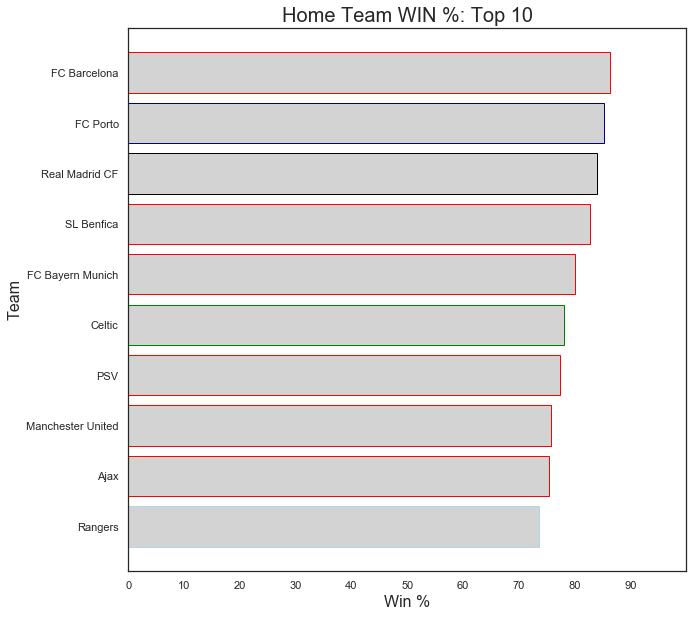

In [55]:
primary_colors = 'lightgray'
secondary_colors = ['red', 'darkblue', 'black', 'red', 'red', 'green', 'red', 'red', 'red', 'lightblue']

plt.figure(figsize=(10,10))
plt.barh(team_win_top_ten.index, width= team_win_top_ten['win_perc'], color= primary_colors, edgecolor= secondary_colors)
plt.gca().invert_yaxis()
plt.title('Home Team WIN %: Top 10', fontsize=20)
plt.xlim(right=1)
plt.xticks(ticks=np.arange(0,1,0.1), labels=np.arange(0,100,10))
plt.xlabel('Win %', fontsize=16)
plt.ylabel('Team', fontsize = 16)
plt.savefig('./01_Graphs_and_Images/top_ten_win_perc.jpg');

In [56]:
team_results_df.head()

win  loss  draw  win_perc  loss_perc  draw_perc
home_team                                                            
1. FC Kaiserslautern    7    15    10  0.218750   0.465567   0.305957
1. FC Köln             31    38    31  0.310000   0.378826   0.307879
1. FC Nürnberg         30    34    21  0.352941   0.398346   0.244894
1. FSV Mainz 05        55    35    29  0.462185   0.292980   0.242161
AC Ajaccio             16    22    18  0.285714   0.390863   0.317592

### Worst performing home teams:

In [57]:
worst_team_win_df = team_results_df.sort_values(by = 'loss_perc', ascending = False)[:10].sort_values(by='loss_perc', ascending = True)

In [58]:
worst_team_win_df

win  loss  draw  win_perc  loss_perc  draw_perc
home_team                                                            
AC Arles-Avignon        0     7     5  0.000000   0.583333   0.397351
FC Dordrecht            2     9     4  0.133333   0.594714   0.254323
Tondela                 0     3     2  0.000000   0.600000   0.357143
FC Energie Cottbus      3     7     1  0.272727   0.620968   0.084078
Córdoba CF              1    12     6  0.052632   0.629834   0.304840
KAS Eupen               3     9     2  0.214286   0.633166   0.134703
Pescara                 4    14     1  0.210526   0.728767   0.050152
SpVgg Greuther Fürth    0    13     4  0.000000   0.764706   0.225166
Le Havre AC             3    14     0  0.176471   0.815068   0.000000
FC Penafiel             0     4     0  0.000000   1.000000   0.000000

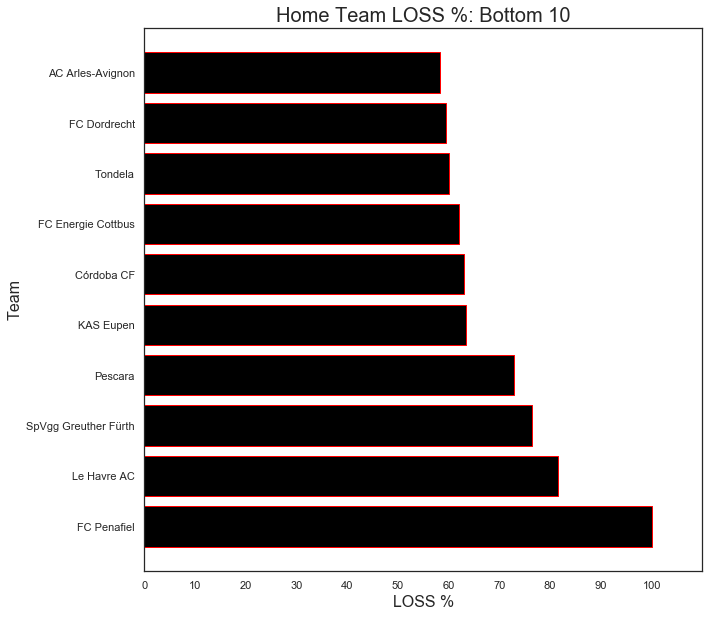

In [59]:
primary_colors = 'black'

plt.figure(figsize=(10,10))
plt.barh(worst_team_win_df.index, width= worst_team_win_df['loss_perc'], color= primary_colors, edgecolor= 'red')
plt.gca().invert_yaxis()
plt.title('Home Team LOSS %: Bottom 10', fontsize=20)
plt.xlim(right=1)
plt.xticks(ticks=np.arange(0,1.2,0.1), labels=np.arange(0,110,10))
plt.xlabel('LOSS %', fontsize=16)
plt.ylabel('Team', fontsize = 16)
plt.savefig('./01_Graphs_and_Images/worst_team_win_perc.jpg');

Many of the teams in the list above have fewer than twenty games with twenty games. A team will play 38 games per league season, as each country's top league consists of 20 competing teams. Every team will play each other twice, once at home and once away. As a team cannot play itself, a team's season consists of 38 games. 

The reason these teams have fewer games with data is likely due to the data cleaning process. Some matches corresponding to these teams contained null fields and were removed. Also, this could be caused by a team entering their county's top division for the first time in the finaly year the data was collected and the collection process ended before the end of the season. However, I believe it is much more likely that match data was dropped due to null values being cleaned for the modeling process. 